<a href="https://colab.research.google.com/github/Benmoussa-marouane/data-science/blob/master/House_pricing_MeVal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import shutil

zipOutputName = "house_data"
fileType = "zip"
path = "/content/drive/My Drive/Colab Notebooks/data science_kaggle/"
fileName = "home-data-for-ml-course.zip"

shutil.make_archive(zipOutputName,fileType,path,fileName)



'/content/house_data.zip'

In [3]:
!unzip '/content/drive/My Drive/Colab Notebooks/data science_kaggle/home-data-for-ml-course.zip'

%cd drive/My\ Drive/Colab\ Notebooks/data\ science_kaggle
!pwd
!ls

Archive:  /content/drive/My Drive/Colab Notebooks/data science_kaggle/home-data-for-ml-course.zip
  inflating: train.csv               
  inflating: sample_submission.csv   
  inflating: test.csv                
/content/drive/My Drive/Colab Notebooks/data science_kaggle
/content/drive/My Drive/Colab Notebooks/data science_kaggle
 home-data-for-ml-course.zip   kaggle.json	       train.csv
 house_data.zip		       sample_submission.csv
'House pricing_MeVal.ipynb'    test.csv


#### import libraries

In [4]:
# Obviously
import pandas as pd

import math

import seaborn as sns


# !pip install xgboost
import numpy as np 

# To build our pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# !pip install impyute
# from impyute.imputation.cs import mice

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# Other helpers
from sklearn.metrics import accuracy_score, classification_report

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


!pip install category_encoders

from category_encoders.target_encoder import TargetEncoder

1.14.0
     |████████████████████████████████| 92kB 3.3MB/s 


In [5]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow
print(tensorflow.__version__)

1.14.0


Using TensorFlow backend.


### The Dataset

In [8]:
# Read data into Pandas DataFrame
train_data = pd.read_csv("/content/train.csv", index_col='Id') 
test_data = pd.read_csv("/content/test.csv", index_col='Id') 

# Seperate target from predictors
y = train_data.SalePrice
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Drop Columns with over 80% missing data
columns_to_drop = train_data.columns[train_data.isnull().mean() > 0.8]


train_data.drop(columns_to_drop, axis=1, inplace=True)

#missing = communes_df.isnull().sum()
#print(communes_df.shape)
#print(missing.sort_values(ascending=False))
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


In [0]:
missing = train_data.isnull().sum()

### seperate categorical data and numerical data, in seperate dataframes

In [13]:
# Select categorical columns
categorical_cols = train_data.select_dtypes(exclude=["number"]).columns
df_categorical = train_data[categorical_cols].fillna(train_data.mode().iloc[0]) # impute missing data using Mode or most frequent For categorical data 


# Select numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = [cname for cname in train_data.columns if 
                train_data[cname].dtype in numerics]

df_numeric = train_data[numerical_cols]

print(df_categorical.shape)
print(df_numeric.shape)

(1460, 39)
(1460, 36)


In [23]:
# impute by mice
# !pip install impyute
from impyute.imputation.cs import mice

# Preprocessing for categorical data
df_numeric = mice(df_numeric)

df_numeric.columns = numerical_cols

df_numeric.head()


/usr/local/lib/python3.6/dist-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


In [24]:
df_numeric.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

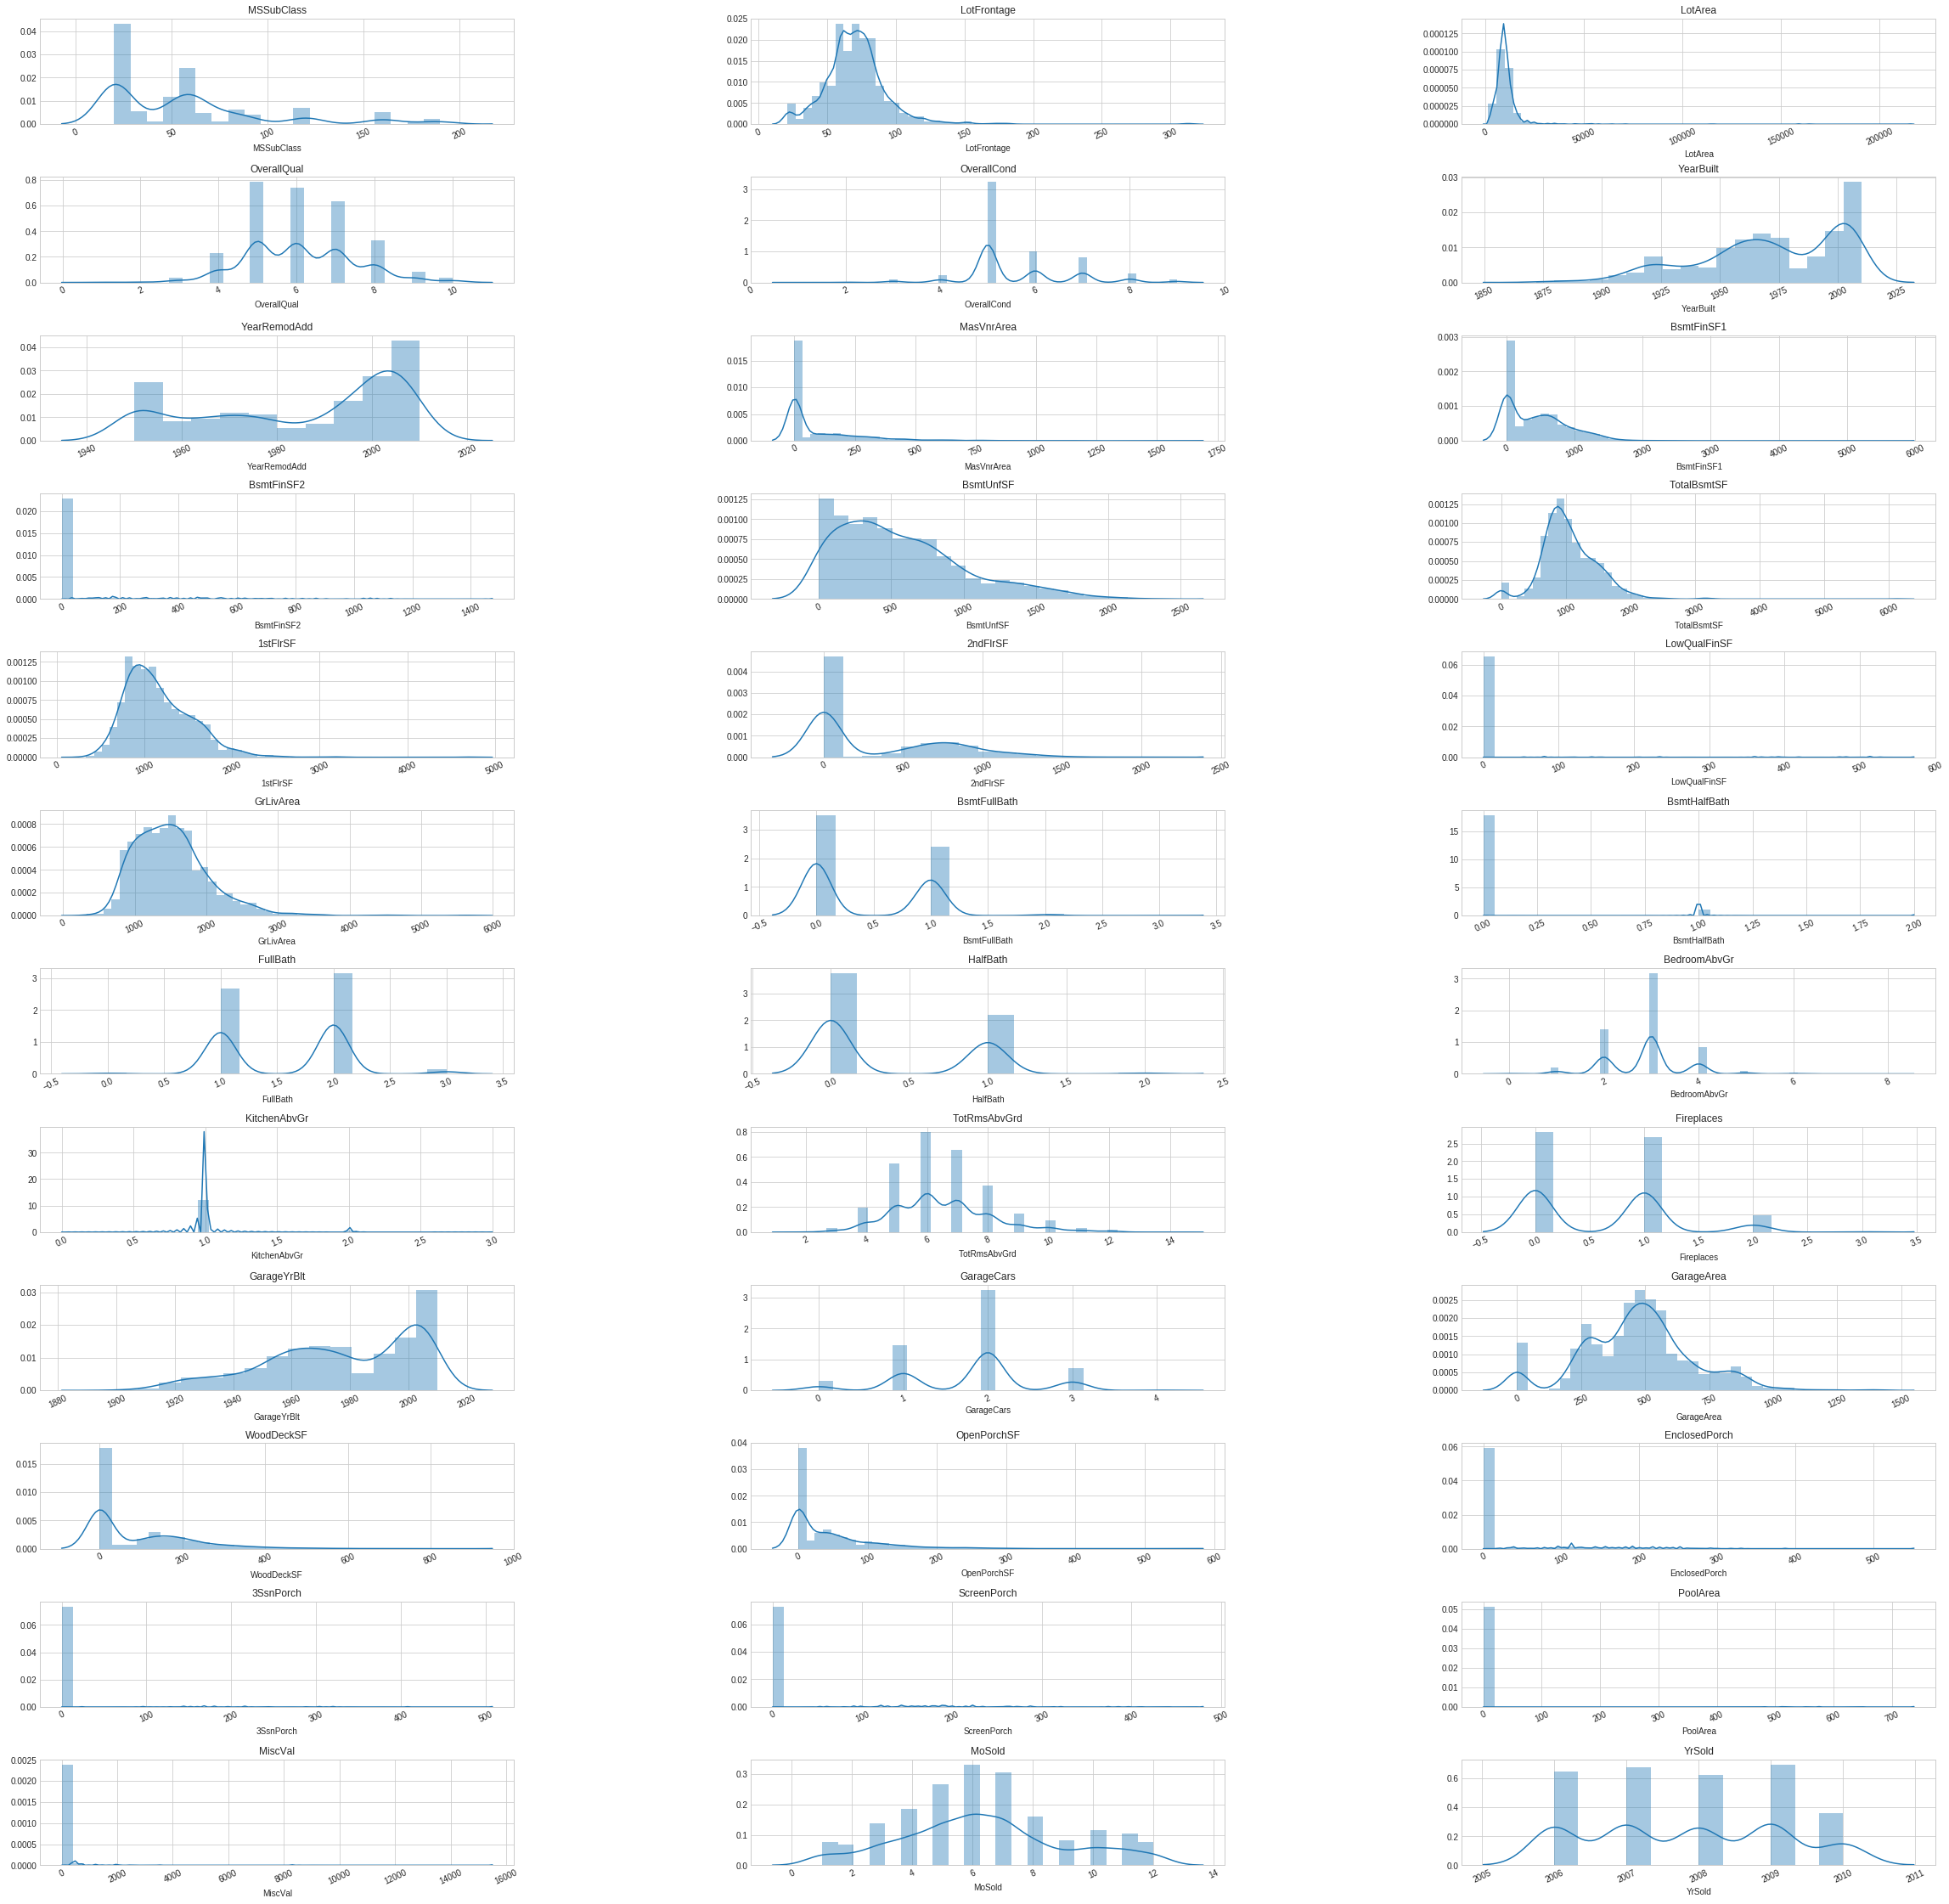

In [25]:
def plot_distribution(dataset, cols=5, width=20, height=45, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df_numeric, cols=3, width=40, height=40, hspace=0.5, wspace=0.5)

## Encode categorical data.

In [0]:
df_categorical[['codgeo','libgeo','dep','cp']].head()

In [0]:
# Decide which categorical variables you want to use in model
for col_name in df_categorical.columns:
#     if df_numeric[col_name].dtypes == 'object':
      unique_cat = len(df_categorical[col_name].unique())
      print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

In [0]:
df_categorical['urbanite_ruralite'].value_counts()

In [0]:
# In this case, bucket low frequecy categories as "Other"
df_categorical['urbanite_ruralite'] = ['Com rurale < 2 000 m habts ' if x == 'Com rurale < 2 000 m habts' else 'Other' for x in df_categorical['urbanite_ruralite']]

print(df_categorical['urbanite_ruralite'].value_counts().sort_values(ascending=False))

In [0]:
# Source: https://maxhalford.github.io/blog/target-encoding-done-the-right-way/
def calc_smooth_mean(df1, cat_name, target, weight):
    # Compute the global mean
    mean = communes_df[target].mean()

    # Compute the number of values and the mean of each group
    agg = communes_df.groupby(cat_name)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + weight * mean) / (counts + weight)

    return df1[cat_name].map(smooth)

In [0]:
WEIGHT = 300
df_categorical['codgeo'] = calc_smooth_mean(df1=communes_df, cat_name='codgeo', target='camping', weight=WEIGHT).astype('category')
df_categorical['libgeo'] = calc_smooth_mean(df1=communes_df, cat_name='libgeo', target='camping', weight=WEIGHT).astype('category')
df_categorical['dep'] = calc_smooth_mean(df1=communes_df, cat_name='dep', target='camping', weight=WEIGHT).astype('category')
df_categorical['cp'] = calc_smooth_mean(df1=communes_df, cat_name='cp', target='camping', weight=WEIGHT).astype('category')

##pipeline


We'll define a new `ColumnTransformer` object that keeps our numerical features and apply one hot encoding on our categorical features. 

That will allow us to create a clean pipeline that includes both features engineering (one hot encoding here) and training the model (a nice way to avoid data leakage)

In [0]:
numeric_features =list(df_numeric)
numeric_features.remove('camping')

categorical_features =list(df_categorical)

te_features = ['codgeo','libgeo','dep','cp']


for i in te_features:
  categorical_features.remove(i)
 


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


                                 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
         ])

                                 
# target_encoding = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('TE', ce.TargetEncoder(cols=te_features) )
#          ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



In [0]:
# print(data.shape)

df_numeric = pd.DataFrame(data=X_incomplete,index= range(0,len(X_incomplete)),columns=X_incomplete.columns)  
# print(df_numeric.shape)

merged =pd.concat([df_numeric, df_categorical], axis=1)


#duplicated columns

merged = merged.loc[:,~merged.columns.duplicated()]

print(merged.shape)

(36677, 96)


Now we can define our 4 models as sklearn `Pipeline` objects, containing our preprocessing step and training of one given algorithm.

Let's split the data into training and test sets.

In [0]:
# Get X, y
y = merged['camping']
X = merged.drop("camping", axis=1)

# X.reset_index(drop=True).head()
np.shape(X)

(36677, 95)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=.3)

#MLP using keras


## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [0]:
def myModel():
    model = keras.Sequential([
        keras.layers.Dense(32, input_shape=(123,),activation = 'relu'),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    
    return model


In [0]:
from keras.wrappers.scikit_learn import KerasClassifier

from keras import callbacks


early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')

# wrap the model using the function you created
clf = KerasClassifier(build_fn=myModel, epochs=50, batch_size=32, verbose=1,validation_split=0.2, callbacks=[early_stopping])

# Now we have a full prediction pipeline.
Mdl = Pipeline(steps=[('preprocessor', preprocessor), ('clf',clf)])



Mdl.fit(X_train, y_train)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 32)                3968      
_________________________________________________________________
dense_44 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 129       
Total params: 8,321
Trainable params: 8,321
Non-trainable params: 0
_________________________________________________________________
Train on 20538 samples, validate on 5135 samples
Epoch 1/50
20538/20538 [==============================] - 2s 115us/step - loss: 0.3234 - acc: 0.8766 - val_loss: 0.2944 - val_acc: 0.8896
Epoch 2/50
20538/20538 [==============================] - 1s 62us/step - loss: 0.2871 - acc: 0.8911 - val_loss: 0.2797 - val_acc: 0.8931
Epoch 3/50
20538/20538 [==============================] -

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [0]:


import matplotlib.pyplot as plt
def plot_training(history):
    # Plot training & validation accuracy values
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.savefig('acc_vs_epochs.png')
    
plot_training(history)

## Make predictions

With the model trained, we can use it to make predictions about some images.

In [0]:
predictions = Mdl.predict(X_test)
predictions

11004/11004 [==============================] - 0s 15us/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [0]:
predictions[0]

array([0.])

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [0]:
np.argmax(predictions[0])

0

So the model is most confident that sample 0 i test data is 0

0.0